# PSTAT 234 Homework 1 - Creating a simulation 
__Author: Laura Urbisci__  
__Due date: April 12, 2018 by 10 pm__


## Central Limit Theorem

For this assignment, I decided to verify the principles behind the **central limit theorem**. In "An Introduction Probability Theory and Mathematical Statistics" by V.K. Rohatgi, Theorem 5.5.14 defines the central limit theorem as folllows. 

> Let $X_1,...,X_N$ be a sequence of independent and identically distributed random variables whose moment generating functions exist in a neighborhood of 0. Let $E[X_i]=\mu$ and $V[X_i]=\sigma^2 > 0$. Defining $\bar{X}_n = (1/n)\sum^{n}_{i=1}X_i$. Let $G_n(x)$ denote the cdf of $\sqrt(n)(\bar{X}_n-\mu)/\sigma$. Then for any $x, -\infty < x < \infty$, $\sqrt(n)(\bar{X}_n-\mu)/\sigma$ has a limiting standard normal distribution. 


## Using simulation to show the Normal approximation to the Binomial distribution

Using the central limit theorem, the normal distribution can be used as an approximation to the binomial distribution. Namely, if $X \sim Bin(n, p)$ and if $n$ is large and/or $p$ is close to $0.5$, then $X$ is approximately $N(np, npq)$.

I simulated 1,000 draws from four different Binomial distributions that had different sized $n$ trials and probabilities. If we expect this principle to hold up empirically (i.e. normal approximation to the binomial distribution), we should see bell-shaped histograms for the last three scenarios.
- $Bin(n = 10, p = 0.1)$ 
- $Bin(n = 100, p = 0.1)$
- $Bin(n = 10, p = 0.5)$
- $Bin(n = 100, p = 0.5)$

In [1]:
import numpy as np
np.random.seed(0)  # set the seed for reproducibility

x1 = np.random.binomial(10, 0.1, 1000) # number of trials=10, probability of trials = 0.1, sample of 1000
x2 = np.random.binomial(100, 0.1, 1000) # number of trials=100, probability of trials = 0.1, sample of 1000
x3 = np.random.binomial(10, 0.5, 1000) # number of trials=10, probability of trials = 0.5, sample of 1000
x4 = np.random.binomial(100, 0.5, 1000) # number of trials=100, probability of trials = 0.5, sample of 1000

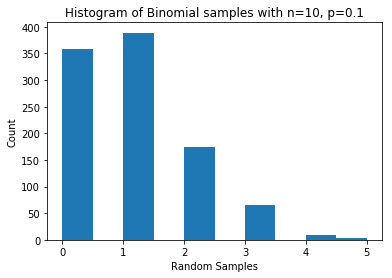

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.hist(x1)
plt.title("Histogram of Binomial samples with n=10, p=0.1")
plt.xlabel("Random Samples")
plt.ylabel("Count")
plt.show()

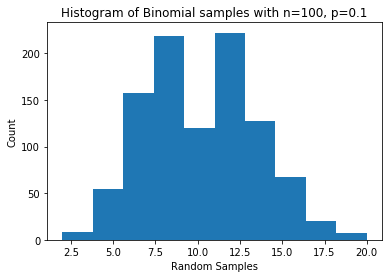

In [3]:
plt.hist(x2)
plt.title("Histogram of Binomial samples with n=100, p=0.1")
plt.xlabel("Random Samples")
plt.ylabel("Count")
plt.show()

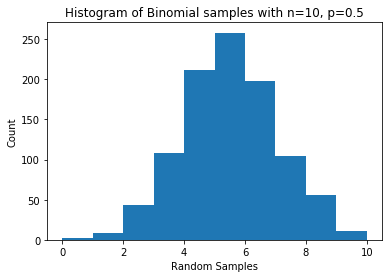

In [4]:
plt.hist(x3)
plt.title("Histogram of Binomial samples with n=10, p=0.5")
plt.xlabel("Random Samples")
plt.ylabel("Count")
plt.show()

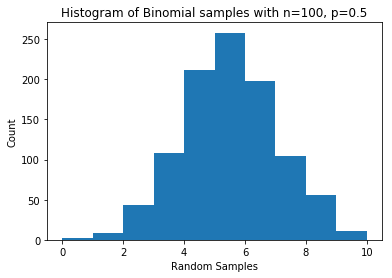

In [5]:
plt.hist(x3)
plt.title("Histogram of Binomial samples with n=100, p=0.5")
plt.xlabel("Random Samples")
plt.ylabel("Count")
plt.show()

## Visual results of the simulation 

Our simulations show that yes when $n$ is large and/or $p$ is close to $0.5$, the normal distribution can be used to approximate the binomial distribution. The theory holds. The first scenario's histogram was skewed, while the remaining three were bell-shaped. 


## Comparing probabilities
From there, I wanted to also compare the exact binomial probabilities to the approximate probabilities using the equation for the central limit theorem. 

> $$Z=\dfrac{X-np}{\sqrt{np(1-p)}}\stackrel {d}{\longrightarrow} N(0,1)$$

For this part of the exercise, I used the third scenario where $Bin(n = 10, p = 0.5)$ to show that $P(X=2) = P(1.5<x<2.5)$. We see from the output below that the probabilities are indeed very similar. 

In [6]:
import scipy.stats as ss
import pandas as pd
import math

mu = 10*0.5   
sigma = 10*0.5*(1-0.5)  
approx_prob = ss.norm.cdf((2.5 - mu)/math.sqrt(sigma)) - ss.norm.cdf((1.5 - mu)/math.sqrt(sigma))

print("Exact Binomial probability:", ss.binom.pmf(2,10,0.5))
print("Approximate probability using CLT:", approx_prob)


Exact Binomial probability: 0.0439453125
Approximate probability using CLT: 0.0434948012496


I then took what I did a step further and created a table that summarizes and compares the exact Binomial probabilities to the Normal approximations for $x$ going from $1,...,10$.

In [7]:
results = []
for k in range(1, 11):
    results += [ss.binom.pmf(k,10,0.5)] 

results2 = ss.norm.cdf((np.arange(1.5,11,1) - mu)/math.sqrt(sigma)) - ss.norm.cdf((np.arange(0.5,10,1) - mu)/math.sqrt(sigma))  

df = pd.DataFrame({
    'norm_approx': results2,
    'bin_prob' : results,
    'P(X=x)': range(1,11)
})
df

,P(X=x),bin_prob,norm_approx
0,1,0.009766,0.011215
1,2,0.043945,0.043495
2,3,0.117188,0.114468
3,4,0.205078,0.204524
4,5,0.246094,0.248170
5,6,0.205078,0.204524
6,7,0.117188,0.114468
7,8,0.043945,0.043495
8,9,0.009766,0.011215
9,10,0.000977,0.001961
